In [498]:
import warnings

warnings.filterwarnings('ignore')

In [309]:
import pandas as pd

In [310]:
df = pd.read_csv("../data/odwp/odwp/odwp01ew/ODWP01EW_LTLA.csv")

In [311]:
df.head()

,Lower tier local authorities code,Lower tier local authorities label,LTLA of workplace code,LTLA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,36937
1,E06000001,Hartlepool,888888888,Workplace is offshore installation,2,"Other (including offshore installation, workin...",372
2,E06000001,Hartlepool,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",186
3,E06000001,Hartlepool,E06000001,Hartlepool,1,"Mainly working at or from home, No fixed place",11804
4,E06000001,Hartlepool,E06000001,Hartlepool,3,Working in the UK but not working at or from home,14513


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74721 entries, 0 to 74720
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Lower tier local authorities code             74721 non-null  object
 1   Lower tier local authorities label            74721 non-null  object
 2   LTLA of workplace code                        74721 non-null  object
 3   LTLA of workplace label                       74721 non-null  object
 4   Place of work indicator (4 categories) code   74721 non-null  int64 
 5   Place of work indicator (4 categories) label  74721 non-null  object
 6   Count                                         74721 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.0+ MB


In [313]:
import geopandas as gpd

In [314]:
gdf = gpd.read_file("../data/London_borough.zip", driver="ESRI Shapefile")

In [315]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      float64 
 6   SUB_2006    0 non-null      float64 
 7   geometry    33 non-null     geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 2.2+ KB


<Axes: >

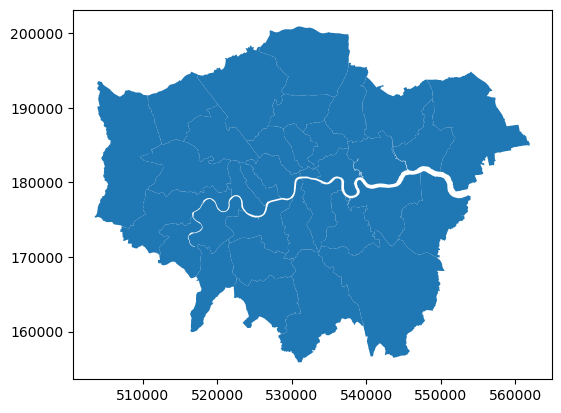

In [316]:
gdf.plot()

In [317]:
gdf.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [318]:
gdf = gdf[['GSS_CODE', 'geometry']]

In [319]:
df = df[df['Lower tier local authorities code'].str.startswith('E')].reset_index(drop=True)
df = df[df['LTLA of workplace code'].str.startswith('E')].reset_index(drop=True)

In [320]:
df = df[df['Lower tier local authorities code'].isin(gdf['GSS_CODE'])].reset_index(drop=True)
df = df[df['LTLA of workplace code'].isin(gdf['GSS_CODE'])].reset_index(drop=True)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Lower tier local authorities code             1120 non-null   object
 1   Lower tier local authorities label            1120 non-null   object
 2   LTLA of workplace code                        1120 non-null   object
 3   LTLA of workplace label                       1120 non-null   object
 4   Place of work indicator (4 categories) code   1120 non-null   int64 
 5   Place of work indicator (4 categories) label  1120 non-null   object
 6   Count                                         1120 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 61.4+ KB


In [322]:
df = df[['Lower tier local authorities code', 'LTLA of workplace code', 'Count']]
df.rename(columns={'Lower tier local authorities code': 'origin', 'LTLA of workplace code': 'destination', 'Count': 'flow'}, inplace=True)

In [323]:
df.head()

,origin,destination,flow
0,E09000001,E09000001,3871
1,E09000001,E09000001,436
2,E09000001,E09000002,2
3,E09000001,E09000003,6
4,E09000001,E09000004,3


In [324]:
gdf.head()

,GSS_CODE,geometry
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<Axes: >

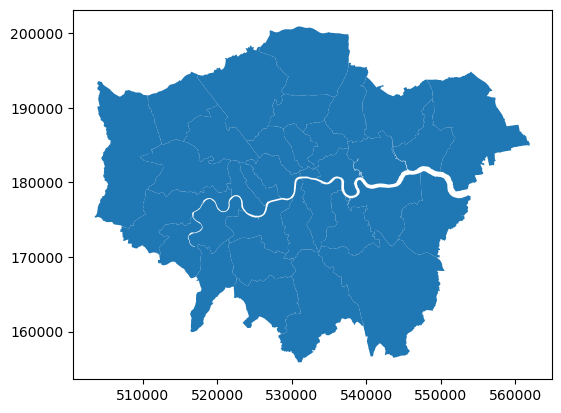

In [325]:
gdf.plot()

In [326]:
centroid = gdf.geometry.centroid

In [327]:
gdf['centroid'] = centroid

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_geometry = GeoDataFrame(g, geometry=self.geometry.name, crs=self.crs)


In [328]:
gdf.head()

,GSS_CODE,geometry,centroid
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16...",POINT (519297.635 166820.011)
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15...",POINT (533290.154 163541.244)
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15...",POINT (542895.512 165655.521)
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17...",POINT (513515.506 175643.224)
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18...",POINT (515887.938 181715.496)


In [329]:
gdf = gdf.drop(columns=['geometry'])

In [330]:
gdf = gdf[['GSS_CODE', 'centroid']]

In [331]:
gdf.head()

,GSS_CODE,centroid
0,E09000021,POINT (519297.635 166820.011)
1,E09000008,POINT (533290.154 163541.244)
2,E09000006,POINT (542895.512 165655.521)
3,E09000018,POINT (513515.506 175643.224)
4,E09000009,POINT (515887.938 181715.496)


In [332]:
gdf.rename(columns={'centroid': 'geometry'}, inplace=True)

<Axes: >

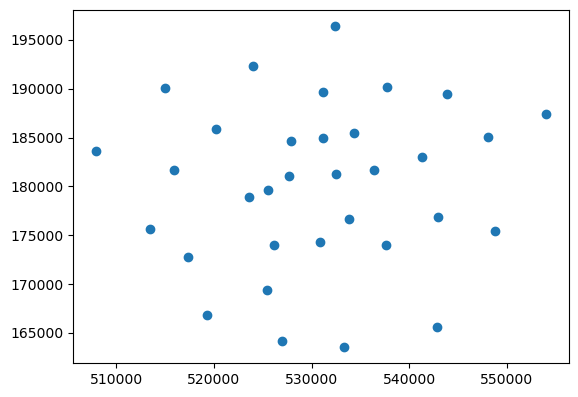

In [333]:
gdf.plot()

In [334]:
df.head()

,origin,destination,flow
0,E09000001,E09000001,3871
1,E09000001,E09000001,436
2,E09000001,E09000002,2
3,E09000001,E09000003,6
4,E09000001,E09000004,3


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   origin       1120 non-null   object
 1   destination  1120 non-null   object
 2   flow         1120 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.4+ KB


In [336]:
gdf['x'] = gdf['geometry'].x
gdf['y'] = gdf['geometry'].y

In [337]:
df_coords = gdf.drop(columns=['geometry'])

In [338]:
merged_df = df.merge(df_coords, how='left', left_on='origin', right_on='GSS_CODE')

In [339]:
merged_df.head()

,origin,destination,flow,GSS_CODE,x,y
0,E09000001,E09000001,3871,E09000001,532479.633543,181271.833312
1,E09000001,E09000001,436,E09000001,532479.633543,181271.833312
2,E09000001,E09000002,2,E09000001,532479.633543,181271.833312
3,E09000001,E09000003,6,E09000001,532479.633543,181271.833312
4,E09000001,E09000004,3,E09000001,532479.633543,181271.833312


In [340]:
merged_df.rename(columns={'x': 'ox', 'y': 'oy'}, inplace=True)

In [341]:
df_od_flow = merged_df.merge(df_coords, how='left', left_on='destination', right_on='GSS_CODE')

In [342]:
df_od_flow.rename(columns={'x': 'dx', 'y': 'dy'}, inplace=True)

In [343]:
df_od_flow = df_od_flow[['origin', 'ox', 'oy', 'destination', 'dx', 'dy', 'flow']]

In [344]:
df_od_flow.head()

,origin,ox,oy,destination,dx,dy,flow
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3


In [345]:
from shapely.geometry import LineString
df_od_flow['geometry'] = df_od_flow.apply(lambda r:LineString([[r['ox'],r['oy']],[r['dx'],r['dy']]]),axis = 1)
df_od_flow = gpd.GeoDataFrame(df_od_flow)

In [346]:
#df_od_flow_test = df_od_flow.sample(n=100, random_state=1)

In [349]:
df_od_flow.head()

,origin,ox,oy,destination,dx,dy,flow,geometry
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ..."
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436,"LINESTRING (532479.634 181271.833, 532479.634 ..."
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2,"LINESTRING (532479.634 181271.833, 548040.122 ..."
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6,"LINESTRING (532479.634 181271.833, 524027.595 ..."
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3,"LINESTRING (532479.634 181271.833, 548794.417 ..."


<Axes: >

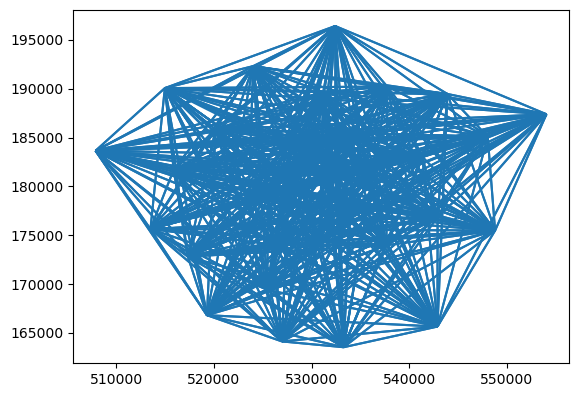

In [347]:
df_od_flow.plot()

In [354]:
df_od_flow.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   origin       1120 non-null   object  
 1   ox           1120 non-null   float64 
 2   oy           1120 non-null   float64 
 3   destination  1120 non-null   object  
 4   dx           1120 non-null   float64 
 5   dy           1120 non-null   float64 
 6   flow         1120 non-null   int64   
 7   geometry     1120 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 70.1+ KB


In [359]:
contains_zero = any(df_od_flow['flow'] == '')

if contains_zero:
    print(f"The column flow contains at least one value of 0.")
else:
    print(f"The column flow does not contain any value of 0.")

The column flow does not contain any value of 0.


In [366]:
df_od_flow

,origin,ox,oy,destination,dx,dy,flow,geometry
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ..."
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436,"LINESTRING (532479.634 181271.833, 532479.634 ..."
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2,"LINESTRING (532479.634 181271.833, 548040.122 ..."
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6,"LINESTRING (532479.634 181271.833, 524027.595 ..."
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3,"LINESTRING (532479.634 181271.833, 548794.417 ..."
...,...,...,...,...,...,...,...,...
1115,E09000033,527686.065085,181043.733482,E09000030,536398.886041,181634.209640,1139,"LINESTRING (527686.065 181043.733, 536398.886 ..."
1116,E09000033,527686.065085,181043.733482,E09000031,537758.137179,190223.388304,82,"LINESTRING (527686.065 181043.733, 537758.137 ..."
1117,E09000033,527686.065085,181043.733482,E09000032,526113.629998,174045.077922,649,"LINESTRING (527686.065 181043.733, 526113.630 ..."
1118,E09000033,527686.065085,181043.733482,E09000033,527686.065085,181043.733482,65572,"LINESTRING (527686.065 181043.733, 527686.065 ..."


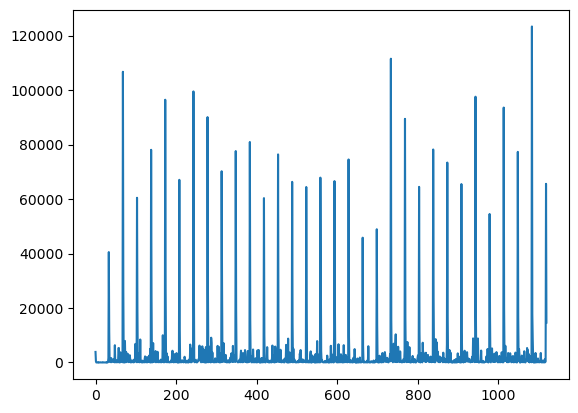

In [368]:
import matplotlib.pyplot as plt

plt.plot(df_od_flow.index, df_od_flow.flow)

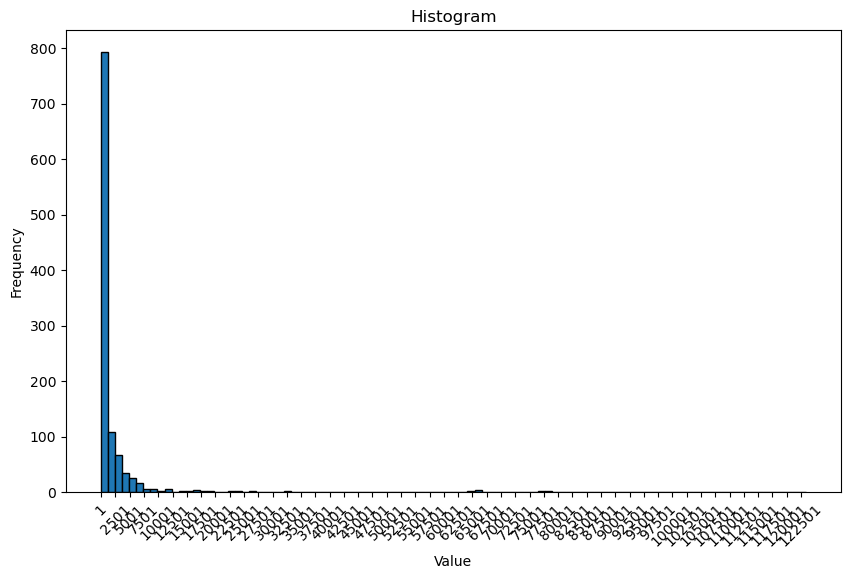

In [397]:
import numpy as np

plt.figure(figsize=(10, 6))
hist, edges, _ = plt.hist(df_od_flow.flow, bins=100, edgecolor='black')
plt.xticks(np.arange(edges.min(), edges.max(), 2500), rotation=45)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [522]:
filtered_df = df_od_flow[df_od_flow['flow'] > 2500]
filtered_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 213 entries, 0 to 1119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   origin       213 non-null    object  
 1   ox           213 non-null    float64 
 2   oy           213 non-null    float64 
 3   destination  213 non-null    object  
 4   dx           213 non-null    float64 
 5   dy           213 non-null    float64 
 6   flow         213 non-null    int64   
 7   geometry     213 non-null    geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 15.0+ KB


In [523]:
filtered_df.head()

,origin,ox,oy,destination,dx,dy,flow,geometry
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ..."
33,E09000002,548040.122277,185087.790195,E09000002,548040.122277,185087.790195,40517,"LINESTRING (548040.122 185087.790, 548040.122 ..."
34,E09000002,548040.122277,185087.790195,E09000002,548040.122277,185087.790195,11291,"LINESTRING (548040.122 185087.790, 548040.122 ..."
48,E09000002,548040.122277,185087.790195,E09000016,554049.030356,187392.024990,6332,"LINESTRING (548040.122 185087.790, 554049.030 ..."
57,E09000002,548040.122277,185087.790195,E09000025,541357.509122,183013.203076,5292,"LINESTRING (548040.122 185087.790, 541357.509 ..."


In [524]:
min_value = filtered_df['flow'].min()
max_value = filtered_df['flow'].max()

filtered_df['flow_normalize'] = (filtered_df['flow'] - min_value) / (max_value - min_value)

In [525]:
filtered_df.head()

,origin,ox,oy,destination,dx,dy,flow,geometry,flow_normalize
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ...",0.011256
33,E09000002,548040.122277,185087.790195,E09000002,548040.122277,185087.790195,40517,"LINESTRING (548040.122 185087.790, 548040.122 ...",0.314562
34,E09000002,548040.122277,185087.790195,E09000002,548040.122277,185087.790195,11291,"LINESTRING (548040.122 185087.790, 548040.122 ...",0.072669
48,E09000002,548040.122277,185087.790195,E09000016,554049.030356,187392.024990,6332,"LINESTRING (548040.122 185087.790, 554049.030 ...",0.031625
57,E09000002,548040.122277,185087.790195,E09000025,541357.509122,183013.203076,5292,"LINESTRING (548040.122 185087.790, 541357.509 ...",0.023017


<Axes: >

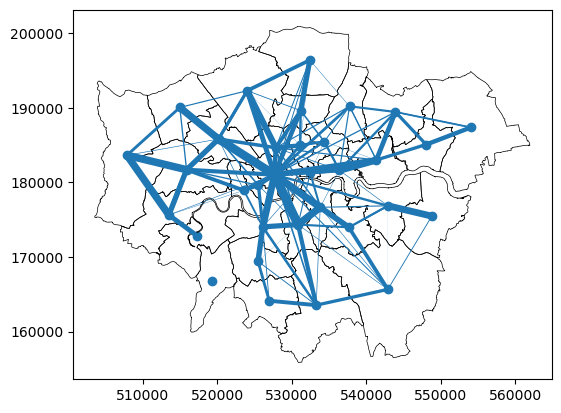

In [533]:
London_borough = gpd.read_file("../data/London_borough.zip", driver="ESRI Shapefile")
ax = gdf.plot()
filtered_df.plot(ax=ax, linewidth = filtered_df['flow_normalize'] * 100)
London_borough.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

In [527]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [528]:
filtered_df.plot(ax=ax, color='lightgray', linewidth=2)

<Axes: >

<Figure size 640x480 with 0 Axes>

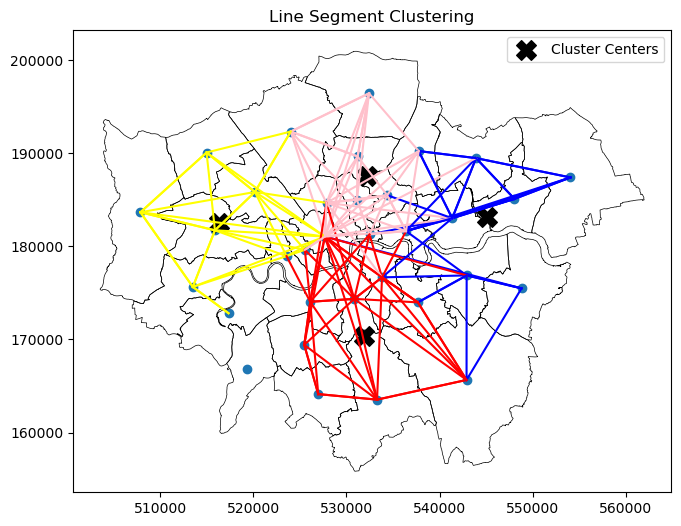

In [529]:
# 将线段数据的坐标转为 NumPy 数组
lines_array = np.array(filtered_df['geometry'].apply(lambda line: [line.xy[0][0], line.xy[1][0], line.xy[0][1], line.xy[1][1]]).tolist())

# 使用 KMeans 聚类
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(lines_array)

# 获取聚类结果和聚类中心
labels = kmeans.labels_
centers = kmeans.cluster_centers_

colors = ['red', 'blue', 'yellow', 'pink']

# 绘制聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制原始线段
gdf.plot(ax=ax)
#filtered_df.plot(ax=ax, linewidth = filtered_df['flow_normalize'] * 100)
London_borough.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# 绘制聚类中心
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Cluster Centers')

# 绘制聚类结果
for i, label in enumerate(labels):
    plt.plot([lines_array[i, 0], lines_array[i, 2]], [lines_array[i, 1], lines_array[i, 3]], color=colors[label])

plt.legend()
plt.title('Line Segment Clustering')
plt.show()

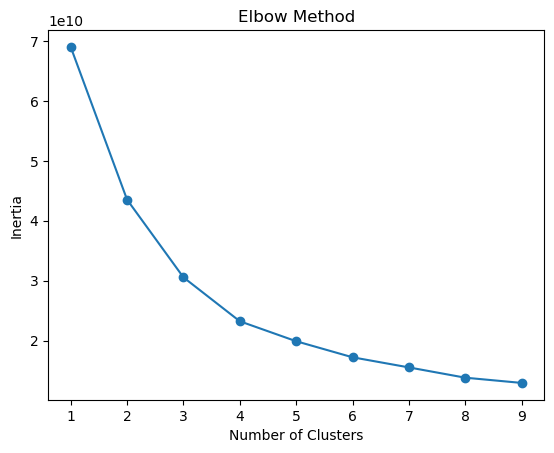

In [530]:
# 肘部法则
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lines_array)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

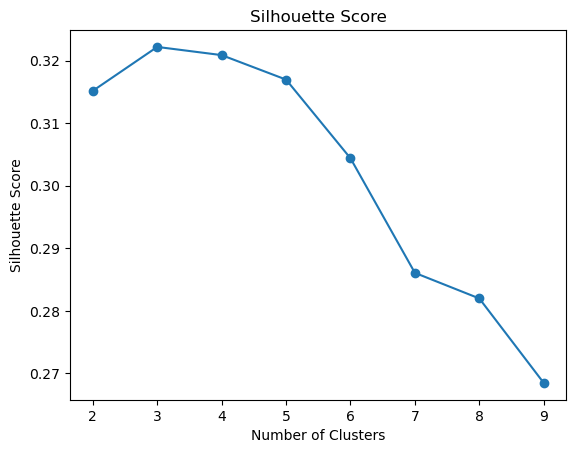

In [531]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(lines_array)
    silhouette_scores.append(silhouette_score(lines_array, labels))

# 绘制轮廓系数图
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()